<a href="https://colab.research.google.com/github/victoraccete/ML-bootcamp/blob/master/Mod_5/Desafio_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
cars = pd.read_csv('https://raw.githubusercontent.com/victoraccete/ML-bootcamp/master/Mod_5/cars.csv')
cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


## Enunciado
Utilize as variáveis:  
```['cylinders' ,'cubicinches' ,'hp' ,'weightlbs' ,'timeto-60']``` 

E as definições:   
```
normaliza = StandardScaler() #objeto para a normalização
pca = PCA(n_components=7)
KMeans(n_clusters=3,random_state=42)
train_test_split(entradas_arvore, saidas_arvore,
test_size=0.30,random_state=42)
DecisionTreeClassifier(random_state=42)
LogisticRegression(random_state=42)
```
A saída deve ser a classificação de eficiência do veículo.


## Perguntas
### Pergunta 1
Após a utilização da biblioteca pandas para a leitura dos dados sobre os valores lidos, é CORRETO afirmar que:
___
a. Existem apenas duas características do tipo “string”.  
b. Os valores nulos encontrados estão presentes apenas no variável “cubicinches”.  
c. Não foram encontrados valores nulos após a leitura dos dados.  
d. Os valores nulos estão presentes apenas para a saída dos dados.

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


**R: c. Não foram encontrados valores nulos após a leitura dos dados.**

### Pergunta 2
Realize a transformação das colunas “cubicinches” e “weightlbs” do tipo “string” para o tipo numérico utilizando o pd.to_numeric(), utilizando o parâmetro  errors='coerce'. Após essa transformação, é CORRETO afirmar:
___
a. Após essa transformação não ocorreu a introdução de valores nulos.  
b. Após a transformação não ocorre mudanças no tipo de variáveis.  
c. Essa transformação deve ser realizada apenas para valores nulos.  
d. Essa transformação adiciona valores nulos ao nosso dataset

In [ ]:
# help(pd.to_numeric)

In [ ]:
print("Before converting to numeric: ")
print(cars.cubicinches.isna().sum())
print(cars.weightlbs.isna().sum())

Before converting to numeric: 
0
0


In [ ]:
cars.cubicinches = pd.to_numeric(cars.cubicinches, errors='coerce')
cars.weightlbs = pd.to_numeric(cars.weightlbs, errors='coerce')
print("After converting to numeric: ")
print(cars.cubicinches.isna().sum())
print(cars.weightlbs.isna().sum())

After converting to numeric: 
2
3


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


**R: d. Essa transformação adiciona valores nulos ao nosso dataset**

### Pergunta 3
Indique quais eram os índices dos valores presentes no dataset que “forçaram” o pandas a compreender a variável “cubicinches” como string.
___
a. 38 e 120.  
b. 40 e 180.  
c. 114 e 180.  
d. 33 e 172.

In [ ]:
cars[cars.cubicinches.isna()].index

Int64Index([40, 180], dtype='int64')

**R: b. 40 e 180.**

### Pergunta 4
Após a transformação das variáveis “string” para os valores numéricos, quantos valores nulos (células no dataframe) passaram a existir no dataset?
___
a. 5.  
b. 3.  
c. 6.  
d. 2.

In [ ]:
cars.isna().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

In [ ]:
print('R: a.', cars.isna().sum().sum())

R: a. 5


### Pergunta 5
Substitua os valores nulos introduzidos no dataset, após a transformação, pelo valor médio das colunas. Qual é o novo valor médio da coluna “weightlbs”?
___
a. 1370,82.  
b. 1367,13.  
c. 3009,83.  
d. 3212,48.

In [ ]:
cars = cars.fillna(cars.mean())
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [ ]:
print('R: c.', cars.weightlbs.mean())

R: c. 3009.8333333333335


### Pergunta 6
Após substituir os valores nulos pela média das colunas, selecione as colunas ```['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']```. Qual é o valor da mediana para a característica 'mpg'?
___
a. 31,4.  
b. 14,8.  
c. 26,3.  
d. 22,0.

In [ ]:
cars = cars.drop(columns=['brand'])
print('R: d.', cars.mpg.median())

R: d. 22.0


### Pergunta 7
Qual é a afirmação CORRETA sobre o valor de 14,00 para a variável “time-to-60”?
___
a. 25% dos valores de “time-to-60” são superiores ou iguais a 14,00.  
b. 75% dos dados são maiores que o valor de 14,00.  
c. Apenas por esse valor é possível afirmar que existe uma menor dispersão entre valores inferiores a 14,00.  
d. Como esse valor representa a mediana para essa variável, é possível dizer que 50% dos valores são superiores a 14,00.

In [ ]:
cars.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


**R: b. 75% dos dados são maiores que o valor de 14,00.**

### Pergunta 8
Sobre o coeficiente de correlação de Pearson entre as variáveis “cylinders” e “mpg”, é correto afirmar, EXCETO:
___
a. Mesmo não sendo igual a 1, é possível dizer que à medida em que a variável “cylinders” aumenta, a variável “mpg” também aumenta na mesma direção.  
b. Quando um coeficiente de correlação de Pearson é igual a 1, o coeficiente de determinação também será igual a 1.  
c. Caso fosse calculado o coeficiente de determinação entre essas duas variáveis, o valor seria, aproximadamente, 0,6.  
d. Mesmo não sendo igual a 1, é possível dizer que à medida que a variável “cylinders” aumenta, a variável “mpg” reduz em uma direção oposta.

In [ ]:
#print(cars.corr(method='pearson'))
print(cars.cylinders.corr(cars.mpg, method='pearson')**2)

0.6032782423312325


**Obs: ele quer a incorreta.**  
**R: a. Mesmo não sendo igual a 1, é possível dizer que à medida em que a variável “cylinders” aumenta, a variável “mpg” também aumenta na mesma direção.**

### Pergunta 9
Sobre o boxplot da variável “hp”, é correto afirmar, EXCETO:
___
a. Cada um dos quartis possui a mesma quantidade de valores para a variável “hp”.  
b. Existe uma maior dispersão no segundo quartil quando comparamos com o terceiro.  
c. Não foi identificada a presença de possíveis outliers nos dados.  
d. Através do boxplot, é possível perceber que a mediana encontra-se entre os valores de 80 e 100.

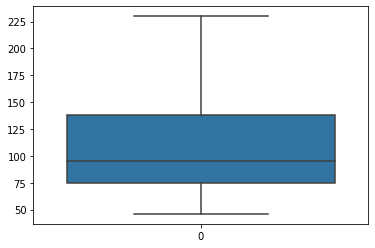

In [ ]:
import seaborn as sns
sns.boxplot(data=cars.hp)

**Obs: ele quer a incorreta.**  
**R: b. Existe uma maior dispersão no segundo quartil quando comparamos com o terceiro.**

### Pergunta 10
Após normalizado, utilizando a função StandardScaler(), qual é o maior valor para a variável “hp”? 
___
a. 1,23  
b. 3,06  
c. 1,18  
d. 9,01

In [ ]:
from sklearn.preprocessing import StandardScaler

normalize = StandardScaler()
scaler = normalize.fit(cars.values)
normalized_cars = scaler.transform(cars.values)
normalized_cars = pd.DataFrame(normalized_cars, columns=cars.columns)
normalized_cars.hp.max()

3.05870398977614

**R: b. 3,06**

### Pergunta 11
Aplicando o PCA, conforme a definição acima, qual é o valor da variância explicada com pela primeira componente principal?
___
a. 92%.  
b. 13%.  
c. 34%.  
d. 72%.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
components = pca.fit_transform(normalized_cars)
pca.explained_variance_ratio_[0]

0.7237134885896341

**R: d. 72%.**

### Pergunta 12
Utilize os três primeiros componentes principais para construir o K-means com um número de 3 clusters. Sobre os clusters, é INCORRETO afirmar que:
___
a. Cada um dos clusters possui características próprias.  
b. Os centroides, utilizando apenas as 3 componentes principais, possuem 3 dimensões.  
c. Todos os clusters possuem a mesma quantidade de elementos.  
d. Existem 3 centroides após a aplicação da clusterização.

In [ ]:
pca_df = pd.DataFrame(components)
pca_df = pca_df.iloc[:, 0:3]
pca_df.head()

,0,1,2
0,3.485219,0.526326,-0.139738
1,-2.176912,-0.285424,-1.304613
2,2.684973,1.046946,-0.732156
3,3.534648,0.847619,-0.801334
4,-2.299222,0.194808,-0.221704


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_df)
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 77,  75, 109]))

**R: c. Todos os clusters possuem a mesma quantidade de elementos.**

### Pergunta 13
Após todo o processamento realizado nos itens anteriores, crie uma coluna que contenha a variável de eficiência do veículo. Veículos que percorrem mais de 25 milhas com um galão (“mpg”>25) devem ser considerados eficientes. Utilize as colunas ```['cylinders'    ,'cubicinches' ,'hp' ,'weightlbs','time-to-60']``` como entradas e como saída a coluna de eficiência criada.

Utilizando a árvore de decisão como mostrado, qual é a acurácia do modelo?
___
a. Aproximadamente, 0,63.  
b. Aproximadamente, 0,70.  
c. Aproximadamente, 0,87.  
d. Aproximadamente, 0,99.

In [ ]:
normalized_cars['efficient'] = (cars['mpg'] > 25).astype(int)
normalized_cars.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,efficient
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539,0
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880,1
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966,0
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966,0
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025,1


In [ ]:
input = normalized_cars.drop(columns=['mpg', 'year', 'efficient']).values
output = normalized_cars.iloc[:, -1].values
print(input.shape)
print(input)
print(output.shape)
print(output)

(261, 5)
[[ 1.39305285  1.37239295  1.45068065  1.41499703 -1.22128734]
 [-0.91910482 -1.03028992 -0.87476849 -1.28008557 -0.53282946]
 [ 1.39305285  0.93052024  0.83221013  0.51820947 -1.56551627]
 ...
 [ 0.23697401  0.28612253  0.13952316 -0.20630047 -0.18860053]
 [ 0.23697401  0.28612253 -0.15734269  0.32823211  0.15562841]
 [ 0.23697401  0.4518248  -0.03364859  0.40493105 -0.18860053]]
(261,)
[0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0
 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0
 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0
 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.30, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

In [ ]:
decision_tree.fit(X_train, y_train)

tree_preds = decision_tree.predict(X_test)
print(tree_preds)

[1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1
 0 0 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, tree_preds)

0.8734177215189873

**R: c. Aproximadamente, 0,87.**

### Pergunta 14
Sobre a matriz de confusão obtida após a aplicação da árvore de decisão, como mostrado anteriormente, é INCORRETO afirmar:
___
a. A matriz de confusão se constitui em uma estratégia ainda mais importante quando um dataset não está balanceado.  
b. Existem duas vezes mais veículos considerados não eficientes que instâncias de veículos eficientes.  
c. A diagonal principal da matriz mostra que as instâncias em que as previsões foram corretas.  
d. Os falso-positivos correspondem a instâncias em que o algoritmo considerou a previsão como verdadeira e, na realidade, ela era falsa.

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, tree_preds)

array([[33,  8],
       [ 2, 36]])

**R: b. Existem duas vezes mais veículos considerados não eficientes que instâncias de veículos eficientes.**

### Pergunta 15
Utilizando a mesma divisão de dados entre treinamento e teste empregada para a análise anterior, aplique o modelo de regressão logística como mostrado na descrição do trabalho.

Comparando os resultados obtidos com o modelo de árvore de decisão, é INCORRETO afirmar que:
___
a. A árvore de decisão e a regressão logística podem ser utilizadas para previsão em regressões.  
b. A acurácia de ambos os modelos foi superior a 80%.  
c. A regressão logística não deveria ser aplicada ao problema, pois ela trabalha apenas com dados categóricos.  
d. Como os dois modelos obtiveram um resultado superior a 80% de acurácia, a escolha sobre qual utilizar deve e pode ser feita a partir de outros critérios, como a complexidade do modelo.

In [ ]:
from sklearn.linear_model import LogisticRegression

logi_regression = LogisticRegression(random_state=42)
logi_regression.fit(X_train, y_train)

lr_preds = logi_regression.predict(X_test)
print(lr_preds)

[1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0
 0 0 1 1 0]


In [ ]:
accuracy_score(y_test, lr_preds)

0.8607594936708861

**R: c. A regressão logística não deveria ser aplicada ao problema, pois ela trabalha apenas com dados categóricos.**